# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [1]:
import pandas as pd
import numpy as np

# Part-1


### Linear Regressor with OLS method

In [2]:
class MyLRFromOLS:


  def __init__(self):
      self.m = 5
      self.b = 4

  def fit(self,X_train,y_train):

    # Calculate values of m and b
       n = len(X_train)
       x_mean = sum(X_train) / n
       y_mean = sum(y_train) / n

       num = sum((X_train[i] - x_mean) * (y_train[i] - y_mean) for i in range(n))
       den = sum((X_train[i] - x_mean) ** 2 for i in range(n))

       self.m = num/den
       self.b = y_mean - self.m*x_mean




  def predict(self,X_test):

    return [self.m * x + self.b for x in X_test]

  def get_coeff(self):

    # Write code to print the value of m and b
    return self.m, self.b


In [3]:
#load dataset
df=pd.read_csv("/content/tvmarketing.csv")

In [4]:
# Separate input and output columns
X = df['TV'].tolist()
y = df['Sales'].tolist()

In [5]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

  ### Prediction time

In [6]:
olslr = MyLRFromOLS()


In [7]:
olslr.fit(X_train,y_train)

In [8]:
olslr_pred = olslr.predict(X_test)

In [9]:
#View predictions
print("Predictions:", olslr_pred)

Predictions: [14.766053111249878, 16.28421064193346, 20.89543678653312, 7.59618763923645, 17.461846857323525, 10.594666998904334, 17.29631566238918, 9.407571858089447, 17.561165574284136, 15.324129711314246, 8.532621256293613, 9.700798546258861, 18.133430562485735, 7.2982314883546255, 13.640440985696317, 15.092386038406161, 7.388091279890414, 16.388258821606478, 10.604125924329153, 18.27058498114562, 17.89695742686524, 10.24941622089841, 8.840036332600256, 18.90906244732096, 10.30616977344733, 9.573103053023793, 17.14024339287965, 13.6309820602715, 11.166931987105933, 7.440115369726923, 16.492307001279496, 10.31562869887215, 16.449741836867805, 7.842119700281765, 20.318442335619114, 18.3084206828449, 9.327170991978477, 19.98737994575042, 12.585770800828907, 8.343442747797216, 12.529017248279988, 15.413989502850033, 9.081238930933162, 9.989295771715865, 17.636836977682695, 8.849495258025076, 10.381841176845889, 14.00933907726429, 11.989858499065258, 10.651420551453253, 10.74128034298904

In [10]:
#Get values of m and b
m, b = olslr.get_coeff()
print("Slope (m):", m)
print("Intercept (b):", b)


Slope (m): 0.04729462712409912
Intercept (b): 7.04284050188449


### Linear Regressor with gradient descent


In [11]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
    self.m = 5 #assign random value
    self.b  = 4 #assign random value
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
    n = len(X_train)
      # calcualte b and m using GD
    for i in range(self.epochs):
      y_pred = [self.m * x + self.b for x in X_train]

      # Calculate slope wrt b and m
      loss_slope_b = (-2/n) * sum(y_train[j] - y_pred[j] for j in range(n))
      loss_slope_m = (-2/n) * sum((y_train[j] - y_pred[j]) * X_train[j] for j in range(n))

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)


  def predict(self,X_test):
    return [self.m * x + self.b for x in X_test]

  def get_coeff(self):
    #Write code to get values of m and b
    return self.m, self.b


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [12]:
#Check with different values of learning_rate and epochs for model convergence
gdlr = MyLRFromGD(0.000001, 1000)

In [13]:
gdlr.fit(X_train,y_train)

In [14]:
gdlr_pred = gdlr.predict(X_train)

In [15]:
# View predictions
print("Predictions:", gdlr_pred)

Predictions: [15.293162042875043, 10.060536549090493, 17.778033240282298, 12.758217874235399, 19.96246661029523, 9.997945335050007, 8.113949792431406, 18.954748064243418, 14.973946851268568, 19.004821035475807, 5.097053275680027, 18.378908895070957, 21.72753884623691, 14.698545509490435, 16.43858125981592, 11.681648992739055, 12.182378705062936, 5.54771001677152, 14.21033403997465, 19.549364597628028, 16.651391387553566, 4.796615448285699, 4.233294521921334, 9.853985542756892, 20.431900715598864, 18.266244709798084, 19.862320667830453, 19.19885379900131, 18.986043671263662, 18.24746734558594, 17.458818048675823, 18.992302792667708, 10.69896693230344, 15.731300541158438, 16.9267927293317, 6.6680927480962024, 13.45923947148883, 12.607998960538234, 15.405826228147916, 17.73421939045396, 13.778454663095303, 21.29565946935756, 16.807869422654782, 8.164022763663795, 8.758639297048404, 9.966649728029765, 11.50013447202165, 18.10976667469687, 5.766779265913218, 8.257909584724523, 19.5243281120

In [16]:
# Get values of m and b
m, b = gdlr.get_coeff()
print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): 0.06259121404048505
Intercept (b): 3.976670544355345


In [17]:
# Compare values of m and b obtained from both methods

# Part-2

### R2 Score
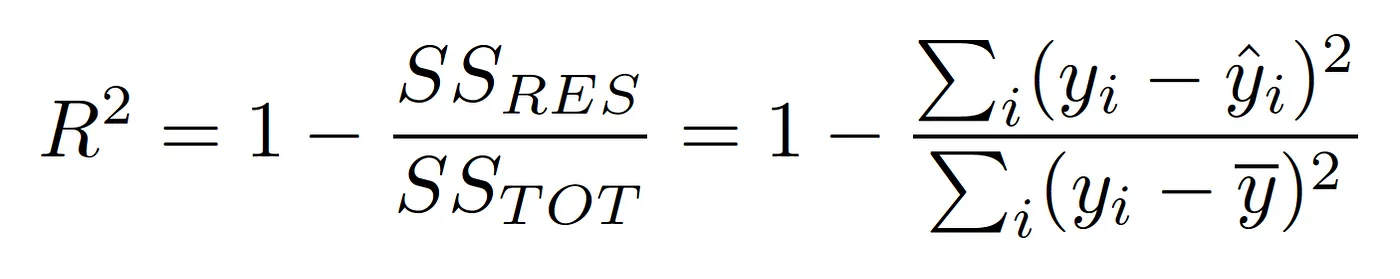

### MEAN ABSOLUTE ERROR
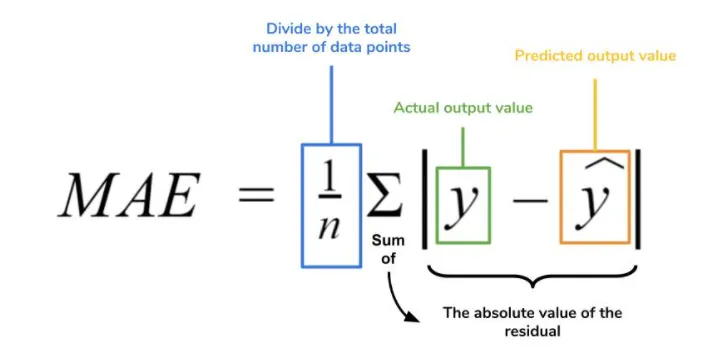

### ROOT MEAN SQUARED ERROR
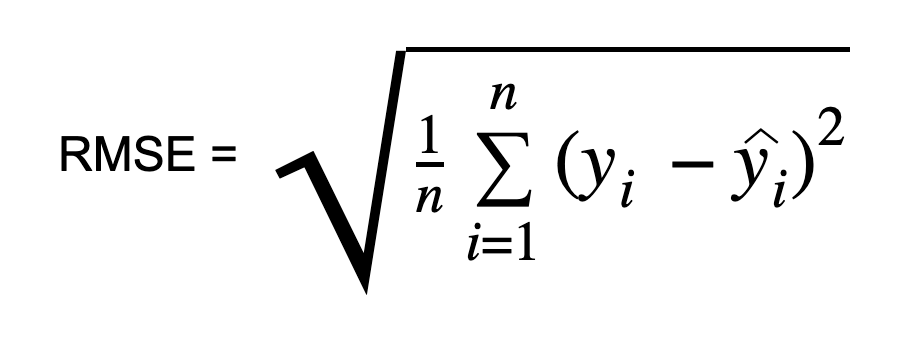

### Evaluation time
Let's see how does both of our models perform.

In [18]:
# Implement R2 Score, MAE and RMSE

class evaluate:

  def __init__(self,y_pred,y_test):
    self.y_pred = np.array(y_pred)
    self.y_test = np.array(y_test)


  def r2score(self):
    #Write code here
    ss_total = np.sum((self.y_test - np.mean(self.y_test))**2)
    ss_residual = np.sum((self.y_test - self.y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2


  def mae(self):
    #Write code here
    mae = np.mean(np.abs(self.y_test - self.y_pred))
    return mae


  def rmse(self):
    #write code here
    rmse = np.sqrt(np.mean((self.y_test - self.y_pred)**2))
    return rmse


In [19]:
# First calculate all the metrics for olslr_pred


In [20]:
eval_ols = evaluate(olslr_pred, y_test)

In [21]:
r2_ols = eval_ols.r2score()

In [22]:
mae_ols = eval_ols.mae()

In [23]:
rmse_ols = eval_ols.rmse()

In [24]:
# Now for gdlr_pred

In [25]:
eval_gd = evaluate(gdlr_pred, y_test)

In [26]:
r2_gd = eval_gd.r2score()

In [27]:
mae_gd = eval_gd.mae()

In [28]:
rmse_gd = eval_gd.rmse()

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!



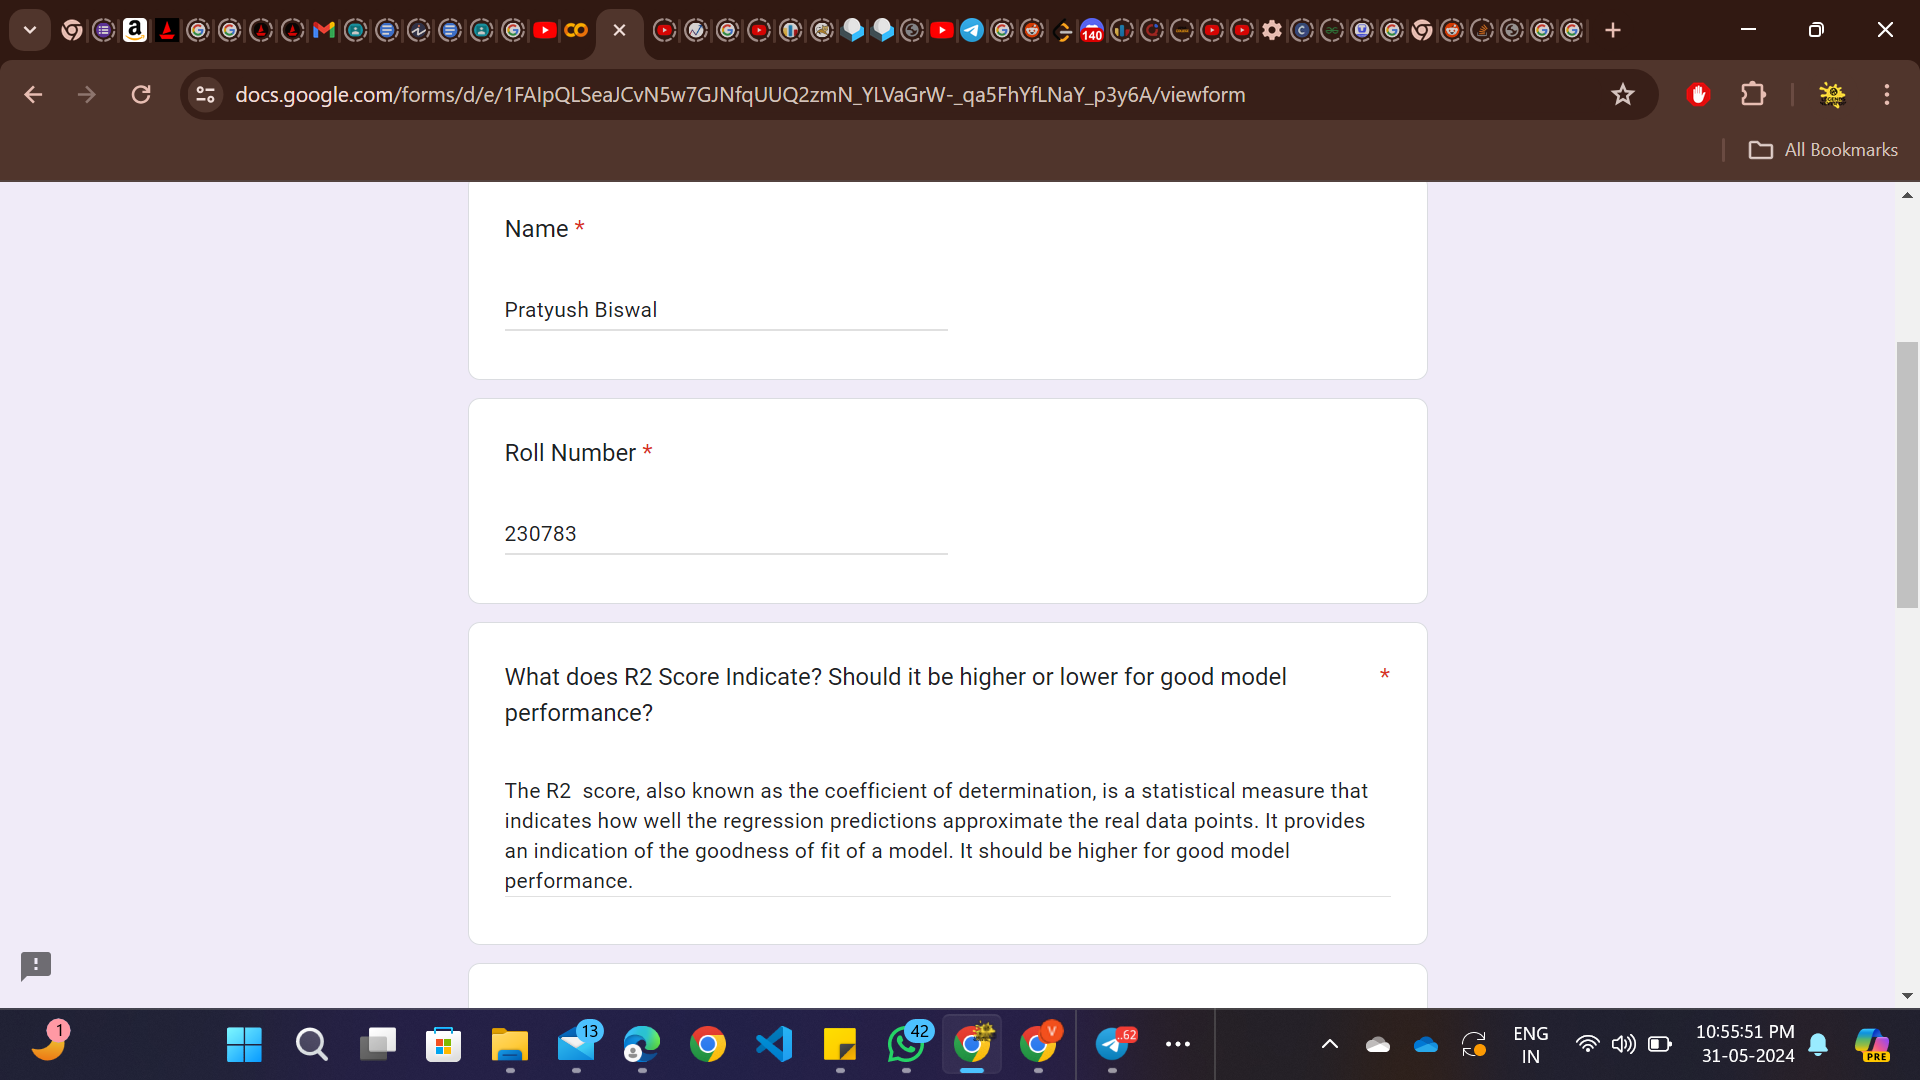

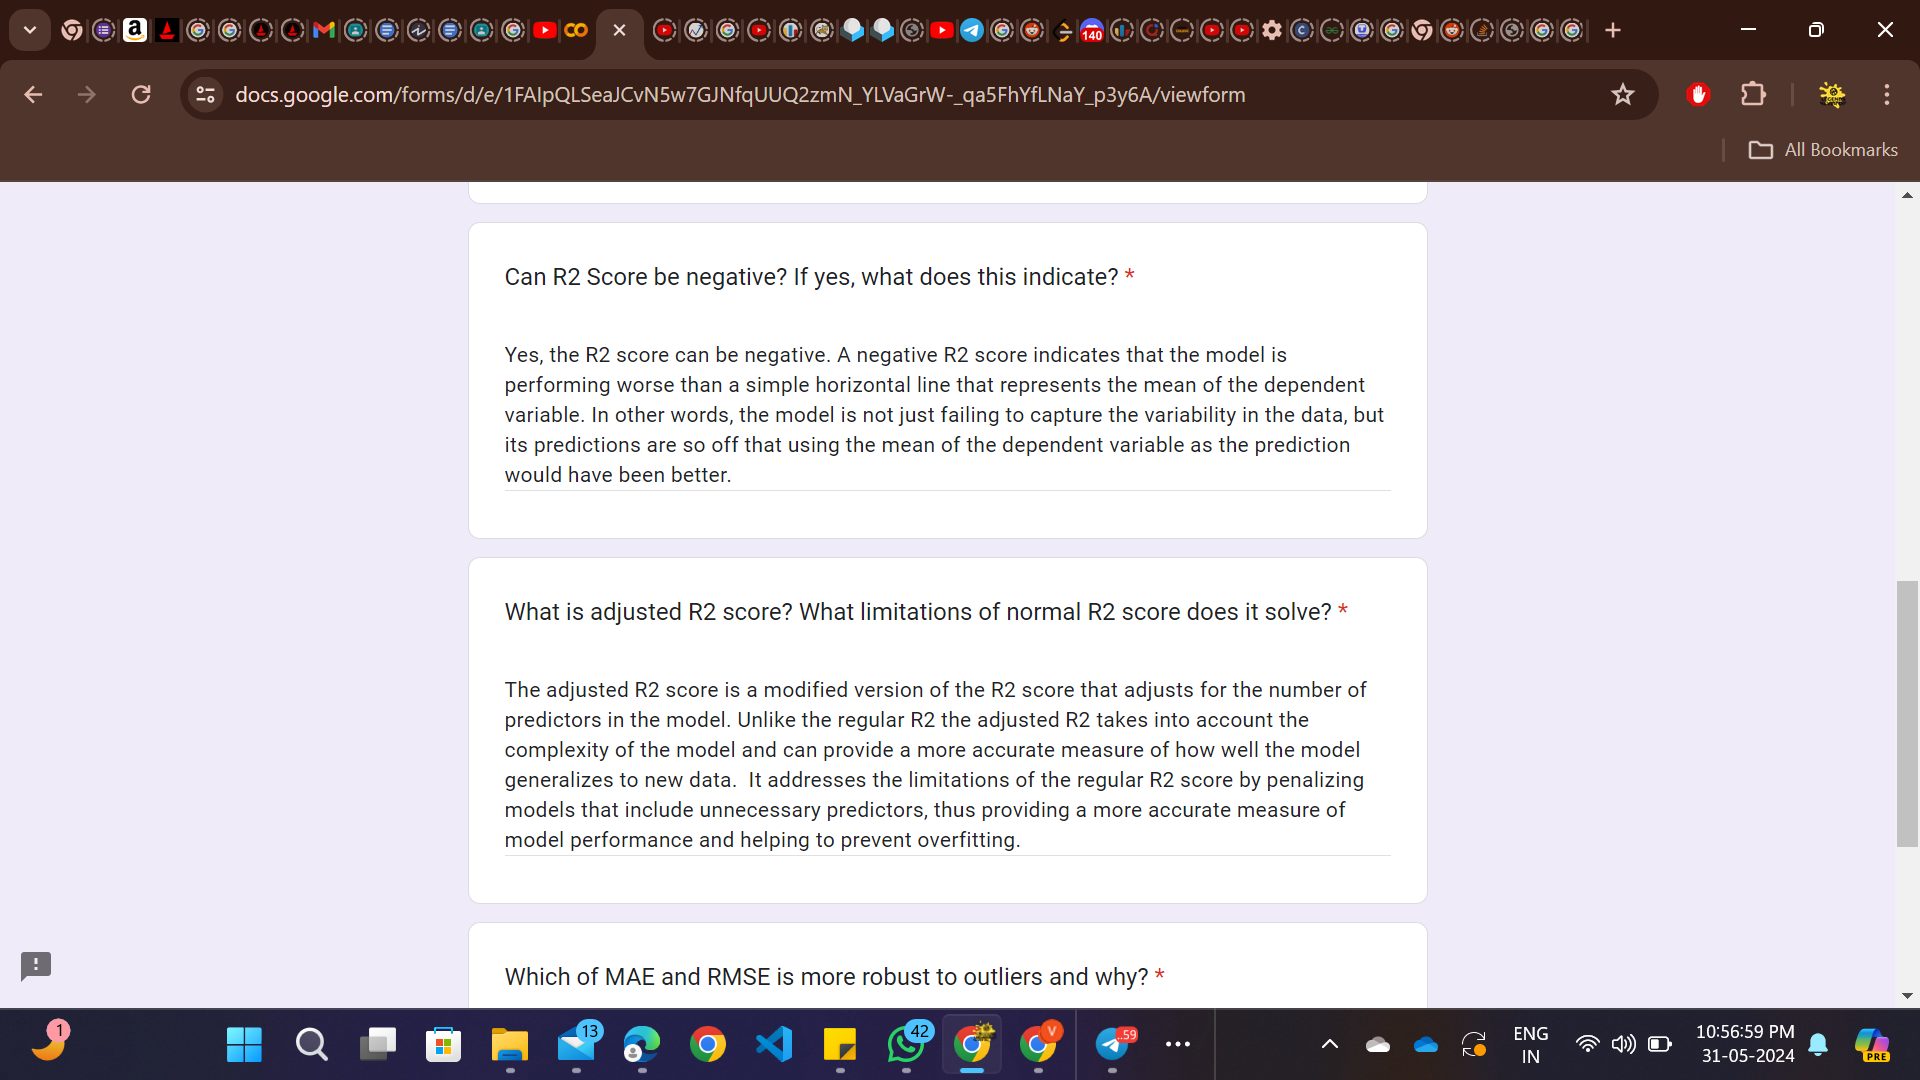

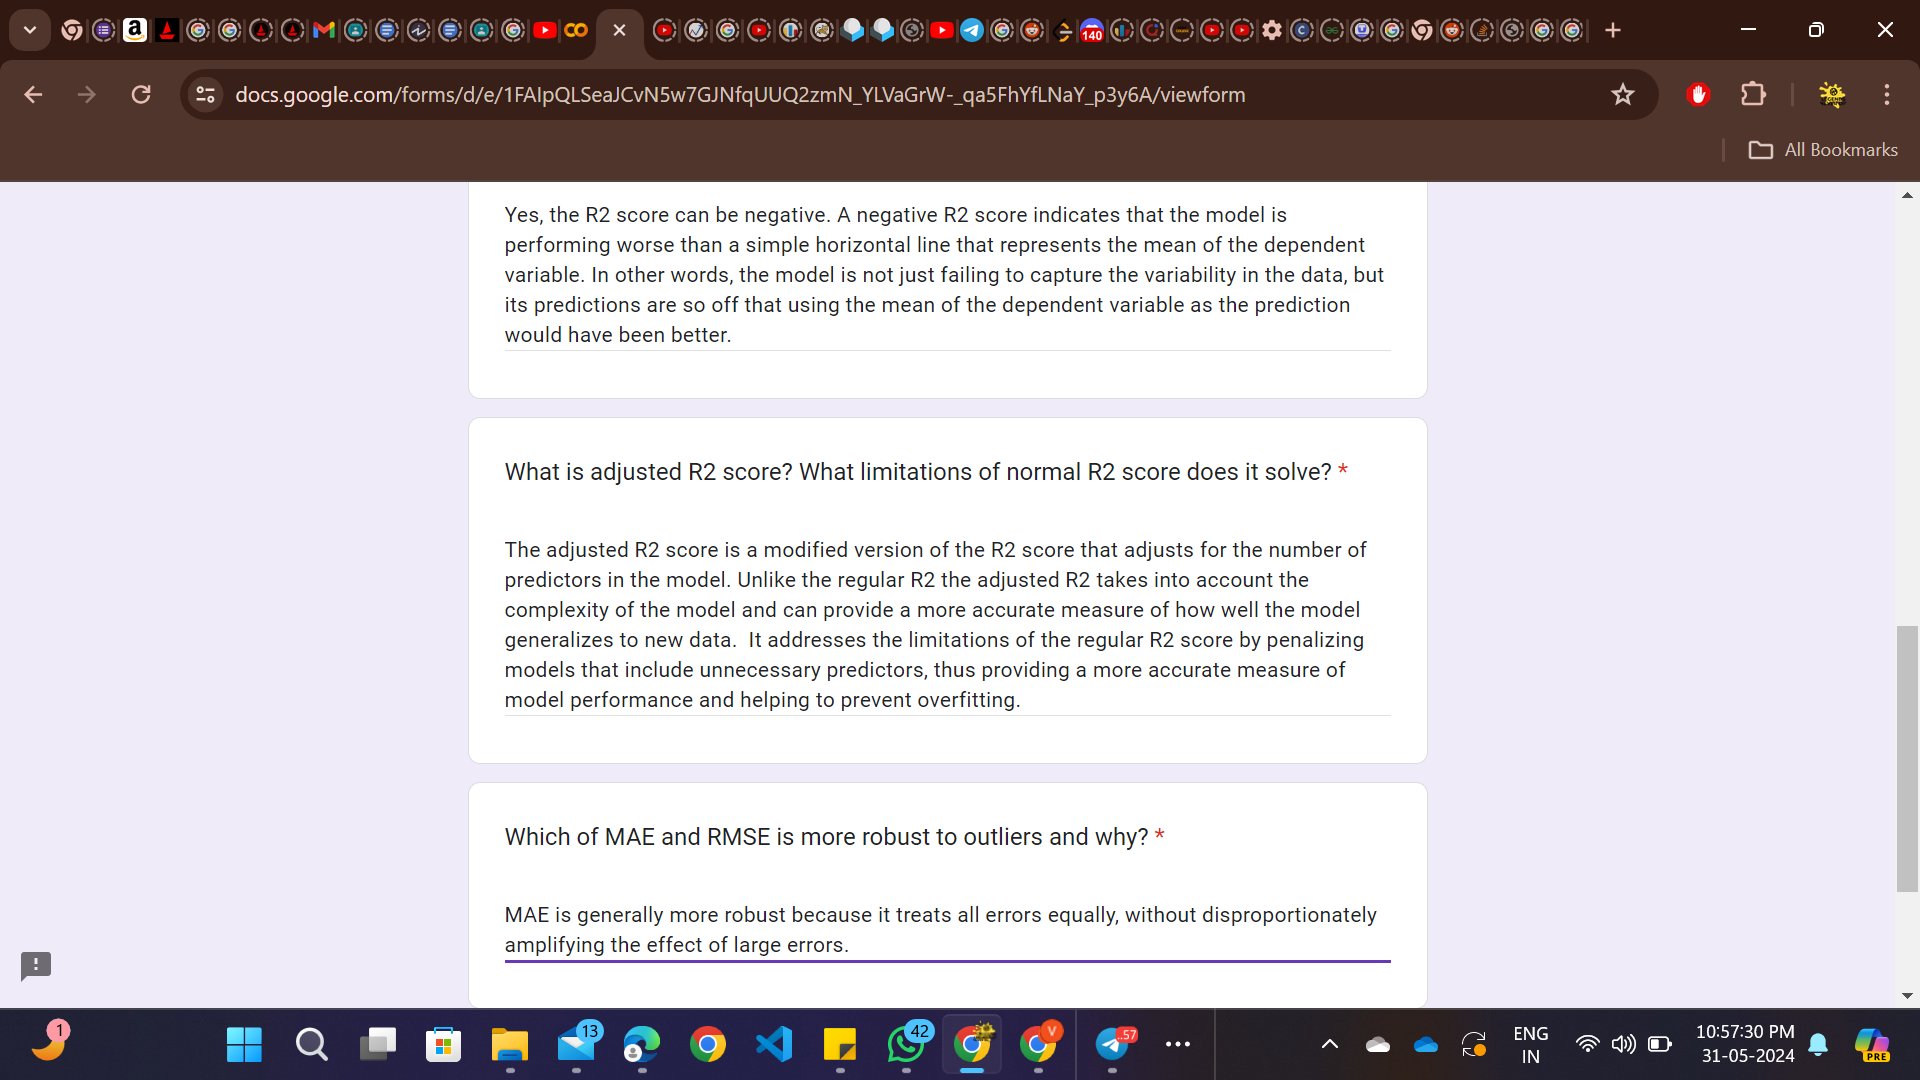